Prepare the environment
-----------------------

First we'll import various functions that we'll need for generating the report.

In [1]:
%matplotlib inline

from os.path import join, exists, expandvars
import pandas as pd
from skbio.draw import boxplots

from taxcompare.eval_framework import (get_expected_tables_lookup, 
                                       find_and_process_result_tables,
                                       compute_mock_results,
                                       compute_mantel,
                                       generate_pr_scatter_plots,
                                       boxplot_from_data_frame,
                                       heatmap_from_data_frame,
                                       method_by_dataset_a1,
                                       method_by_dataset_a2,
                                       performance_rank_comparisons,
                                       parameter_comparisons)

Configure local environment-specific values
-------------------------------------------

**This is the only cell that you will need to edit to generate reports locally.** After editing this cell, you can run all cells in this notebook to generate your analysis report. Some of the analyses make take a few minutes to run, and analyses at more specific taxonomic levels (e.g., genus or species) will be slower than analyses at more general taxonomic levels (e.g., phylum, class). 

**This cell will not run until you fill in a taxonomic level (``2`` through ``7``).**

In [2]:
## project_dir should be the directory where you've downloaded (or cloned) the 
## short-read-tax-assignment repository. 
project_dir = expandvars("$HOME/data/short-read-tax-assignment")

precomputed_results_dir = expandvars("$HOME/data/short-read-tax-assignment/data/precomputed-results/")
expected_results_dir = join(precomputed_results_dir, "simulated-community")

## results_dirs should contain the directory or directories where
## results can be found. By default, this is just the precomputed 
## results included with the project. If other results should be included, 
## absolute paths to those directories should be added to this list.
results_dirs = \
 [precomputed_results_dir,
  ]

## Taxonomic level at which analyses should be performed. Edit this to
## the desired taxonomic level. 
# 2: phylum, 3: class, 4: order, 5: family, 6: genus, 7: species
taxonomic_level = 4

## Reference choice (must be partial-ref or full-ref)
reference_choice = "partial-ref"

## Minimum number of times an OTU must be observed for it to be included in analyses. Edit this
## to analyze the effect of the minimum count on taxonomic results.
min_count = 1

# set to true if select tables should be written as Excel files (useful for publication)
write_xls_files = False

In [3]:
# Define the subdirectories where the data should be, and confirm that they exist.
simulated_results_dirs = [join(results_dir,"simulated-community") for results_dir in results_dirs]

for simulated_results_dir in simulated_results_dirs:
    assert exists(simulated_results_dir), "Simulated community result directory doesn't exist: %s" % simulated_results_dir

Find pre-computed tables, expected tables, and "query" tables
-------------------------------------------------------------

Next we'll use the paths defined above to find all of the tables that will be compared. These include the *pre-computed result* tables (i.e., the ones that the new methods will be compared to), the *expected result* tables (i.e., the tables containing the known composition of the mock microbial communities), and the *query result* tables (i.e., the tables generated with the new method(s) that we want to compare to the *pre-computed result* tables).

In [4]:
results = []
for simulated_results_dir in simulated_results_dirs:
    results += find_and_process_result_tables(simulated_results_dir)

In [5]:
# Uncomment for test runs (looks at a small subset of the data)

# from random import shuffle
# shuffle(results)
# results = results[:10]

In [6]:
result_fp = join(precomputed_results_dir,'simulated-community', 'level%d-results.csv') % taxonomic_level
if exists(result_fp):
    simulated_results = pd.DataFrame.from_csv(result_fp)
else:
    expected_tables = get_expected_tables_lookup(expected_results_dir, level=taxonomic_level)
    simulated_results = compute_mock_results(results, expected_tables, taxonomy_level=taxonomic_level, min_count=min_count)
    simulated_results.to_csv()

In [7]:
refernece_choice_v = [e.endswith(reference_choice) for e in simulated_results['Parameters']]
simulated_results = simulated_results[refernece_choice_v]

Evalution 1: Compute and summarize precision, recall, and F-measure
-------------------------------------------------------------------

In this evaluation, we compute and summarize precision, recall, and F-measure of each result (pre-computed and query) based on the known composition of the simulated communities. We then summarize the results in two ways: first with boxplots, and second with a table of the top methods based on their F-measures.

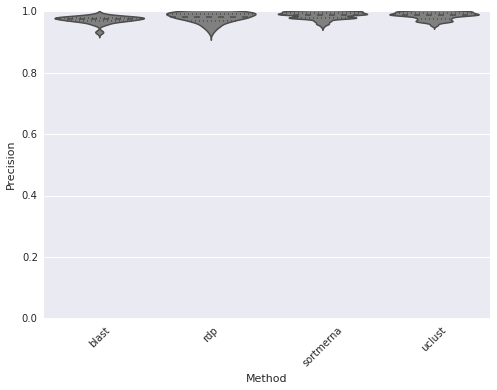

In [8]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="Precision")

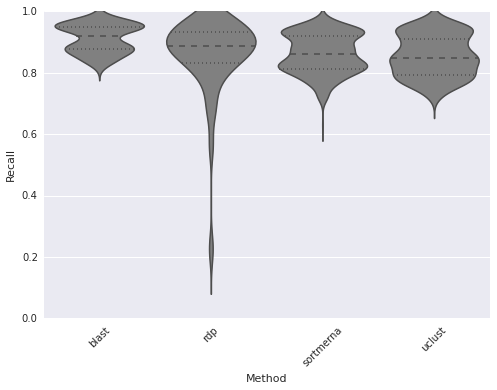

In [9]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="Recall")

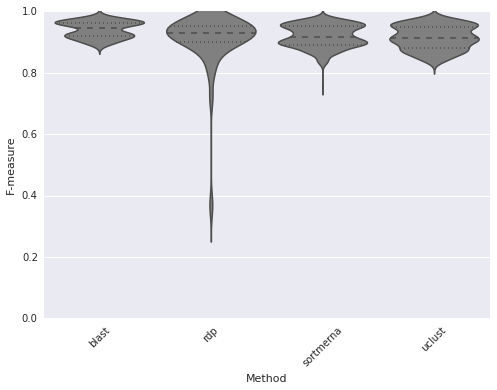

In [10]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="F-measure")

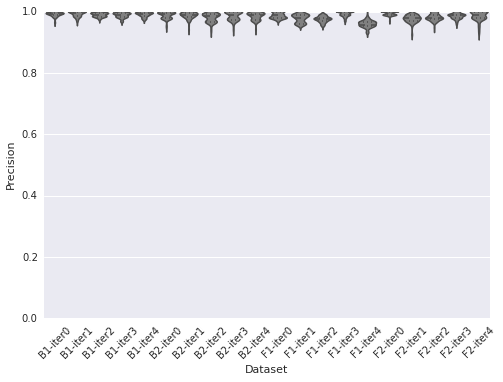

In [11]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="Precision")

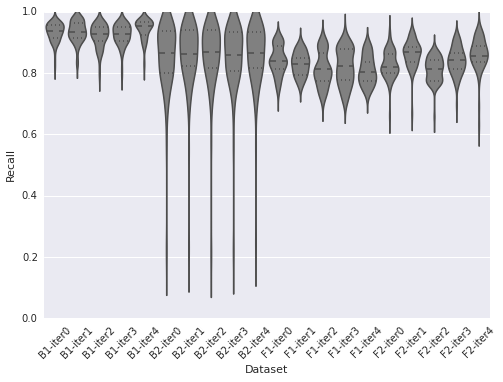

In [12]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="Recall")

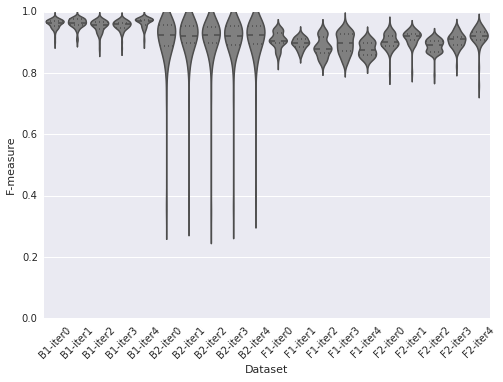

In [13]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="F-measure")

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


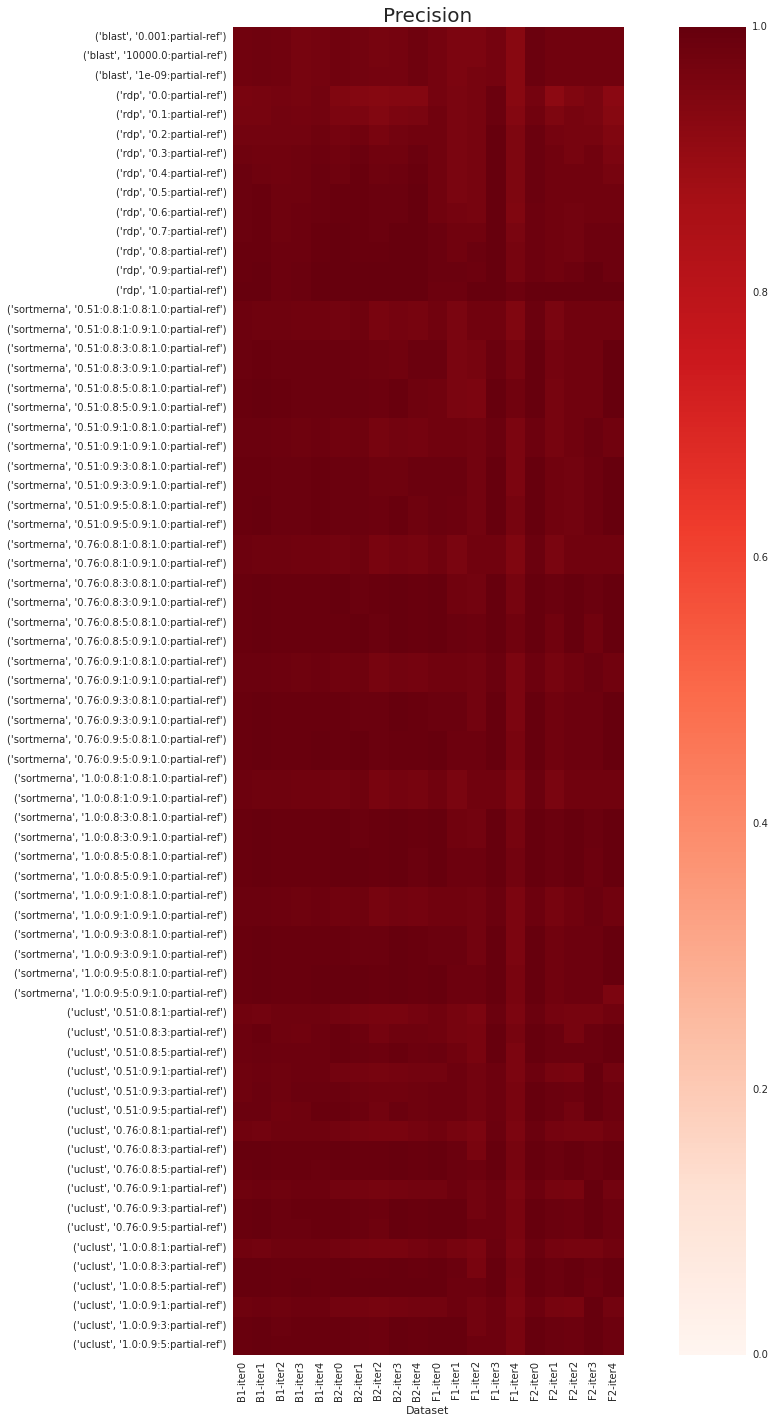

In [14]:
heatmap_from_data_frame(simulated_results, "Precision")

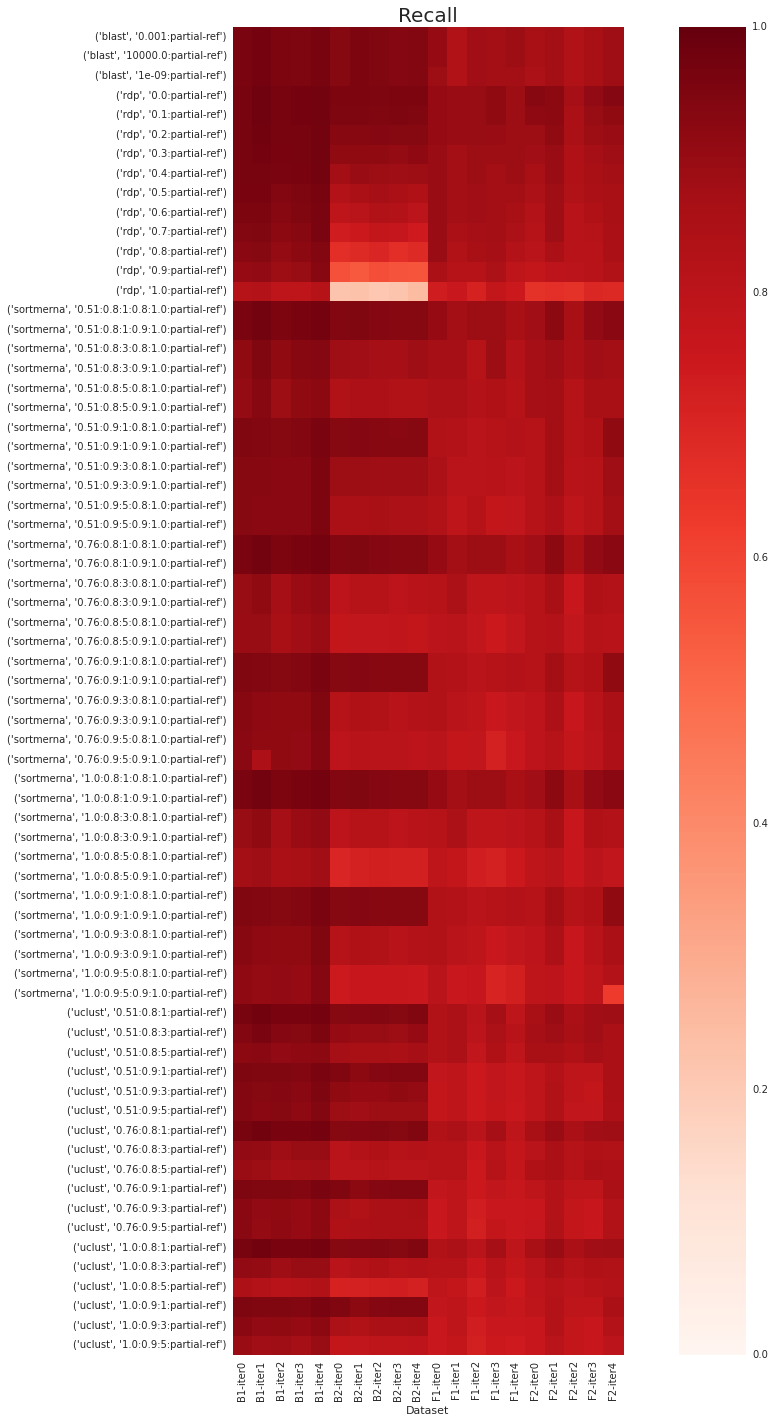

In [15]:
heatmap_from_data_frame(simulated_results, "Recall")

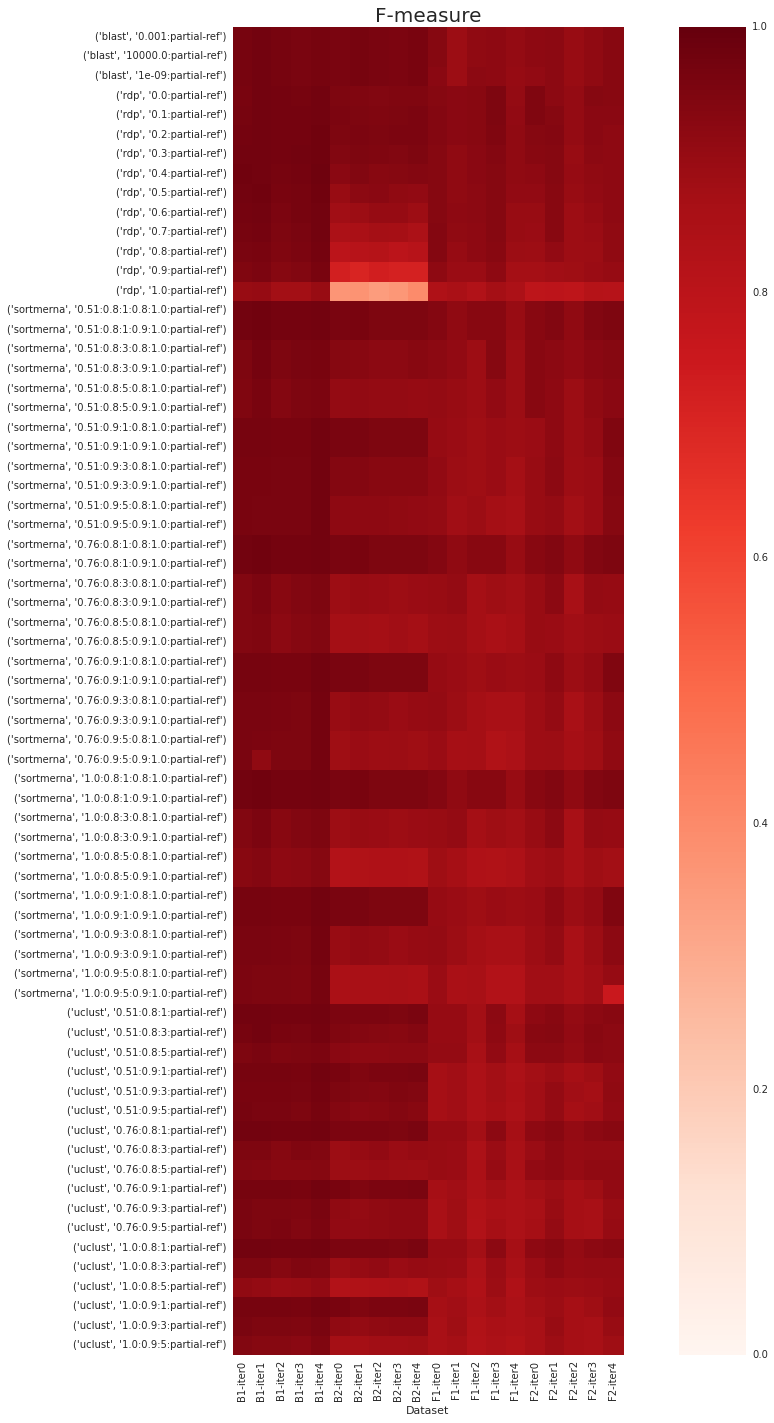

In [16]:
heatmap_from_data_frame(simulated_results, "F-measure")

In [17]:
method_by_dataset_a1(simulated_results, 'B1-iter0')

Method  Precision    Recall  F-measure
215        rdp   0.990000  0.964912   0.977295
271     uclust   0.980237  0.966862   0.973503
182  sortmerna   0.987952  0.959064   0.973294
208      blast   0.980040  0.957115   0.968442

In [18]:
method_by_dataset_a1(simulated_results, 'B2-iter0')

Method  Precision    Recall  F-measure
2166     uclust   0.976517  0.946869   0.961464
2040  sortmerna   0.976471  0.944972   0.960463
2112      blast   0.978218  0.937381   0.957364
2138        rdp   0.954373  0.952562   0.953466

In [19]:
method_by_dataset_a1(simulated_results, 'F1-iter0')

Method  Precision    Recall  F-measure
1904  sortmerna   0.979592  0.905660   0.941176
2002        rdp   0.979592  0.905660   0.941176
1981      blast   0.969697  0.905660   0.936585
2031     uclust   0.988889  0.839623   0.908163

In [20]:
method_by_dataset_a1(simulated_results, 'F2-iter0')

Method  Precision  Recall  F-measure
1166        rdp   0.968750    0.93   0.948980
1088  sortmerna   0.988764    0.88   0.931217
1193     uclust   1.000000    0.87   0.930481
1165      blast   0.988506    0.86   0.919786

## Evaluation 2: Rank-based statistics comparing the performance of the optimal parameter setting run for each method on each data set.

*Count best* column indicates how many samples a given method achieved the best result or tied for the best result (which is why they sum to more than the total number of samples).

### Within-method comparisons of parameter performance

In [21]:
rdp_top_params = parameter_comparisons(simulated_results, "rdp", metrics=['Precision', 'Recall', 'F-measure'])
rdp_top_params[:15]

F-measure  Precision  Recall      Mean
0.0:partial-ref          7          0      20  9.000000
1.0:partial-ref          0         18       0  6.000000
0.2:partial-ref         10          1       6  5.666667
0.1:partial-ref          5          0      10  5.000000
0.9:partial-ref          0          6       0  2.000000
0.3:partial-ref          2          1       2  1.666667
0.4:partial-ref          3          1       1  1.666667
0.7:partial-ref          0          3       0  1.000000
0.8:partial-ref          0          3       0  1.000000
0.5:partial-ref          1          1       0  0.666667
0.6:partial-ref          0          2       0  0.666667

In [22]:
uclust_top_params = parameter_comparisons(simulated_results, "uclust", metrics=['Precision', 'Recall', 'F-measure'])
uclust_top_params[:15]

F-measure  Precision  Recall      Mean
0.51:0.8:1:partial-ref          9          0      15  8.000000
1.0:0.8:1:partial-ref           9          0      15  8.000000
0.76:0.8:1:partial-ref          9          0      15  8.000000
0.51:0.8:3:partial-ref          6          5       6  5.666667
1.0:0.8:5:partial-ref           0         10       0  3.333333
0.76:0.8:5:partial-ref          0          8       0  2.666667
1.0:0.8:3:partial-ref           0          8       0  2.666667
0.76:0.8:3:partial-ref          0          8       0  2.666667
1.0:0.9:5:partial-ref           0          7       0  2.333333
0.51:0.8:5:partial-ref          2          3       2  2.333333
0.51:0.9:1:partial-ref          3          1       2  2.000000
1.0:0.9:1:partial-ref           3          1       2  2.000000
0.76:0.9:1:partial-ref          3          1       2  2.000000
0.76:0.9:3:partial-ref          0          5       0  1.666667
0.76:0.9:5:partial-ref          0          5       0  1.666667

In [23]:
sortmerna_top_params = parameter_comparisons(simulated_results, "sortmerna", metrics=['Precision', 'Recall', 'F-measure'])
sortmerna_top_params[:15]

F-measure  Precision  Recall       Mean
0.51:0.8:1:0.8:1.0:partial-ref         16          0      20  12.000000
1.0:0.8:1:0.9:1.0:partial-ref          16          0      20  12.000000
0.51:0.8:1:0.9:1.0:partial-ref         16          0      20  12.000000
0.76:0.8:1:0.9:1.0:partial-ref         16          0      20  12.000000
0.76:0.8:1:0.8:1.0:partial-ref         16          0      20  12.000000
1.0:0.8:1:0.8:1.0:partial-ref          16          0      20  12.000000
1.0:0.8:3:0.9:1.0:partial-ref           0         11       0   3.666667
1.0:0.8:3:0.8:1.0:partial-ref           0         11       0   3.666667
0.76:0.8:3:0.8:1.0:partial-ref          0         11       0   3.666667
0.76:0.8:3:0.9:1.0:partial-ref          0         11       0   3.666667
1.0:0.8:5:0.8:1.0:partial-ref           0          9       0   3.000000
1.0:0.8:5:0.9:1.0:partial-ref           0          9       0   3.000000
0.76:0.8:5:0.8:1.0:partial-ref          0          8       0   2.666667
0.76:0.8:5:0.9:1.0:partial-ref          0          8       0   2.666667
0.76:0.9:5:0.8:1.0:partial-ref          0          8       0   2.666667

In [24]:
blast_top_params = parameter_comparisons(simulated_results, "blast", metrics=['Precision', 'Recall', 'F-measure'])
blast_top_params[:15]

F-measure  Precision  Recall       Mean
0.001:partial-ref           17         17      20  18.000000
10000.0:partial-ref         17         17      20  18.000000
1e-09:partial-ref           17         17      16  16.666667

### Between-method performance comparisons based on best parameter set determined above

In [25]:
mp_combs = {"rdp": rdp_top_params.index[0],
            "blast": blast_top_params.index[0], 
            "sortmerna": sortmerna_top_params.index[0],
            "uclust": uclust_top_params.index[0]}

In [26]:
metric = 'Precision'
df = performance_rank_comparisons(simulated_results, metric, mp_combs)
if write_xls_files: 
    df.to_excel('tables/level%d_%s_rankstats.xlsx' % (taxonomic_level, metric), 
                                      na_rep='NA', float_format="%1.3f")
df

Count best  sortmerna: wilcoxon stat  sortmerna: wilcoxon p  \
sortmerna          10                       NaN                    NaN   
uclust              5                        86               0.478125   
blast               4                        53               0.052222   
rdp                 1                         6               0.000219   

           uclust: wilcoxon stat  uclust: wilcoxon p  blast: wilcoxon stat  \
sortmerna                     86            0.478125                    53   
uclust                       NaN                 NaN                    78   
blast                         78            0.743950                   NaN   
rdp                            9            0.000338                    21   

           blast: wilcoxon p  rdp: wilcoxon stat  rdp: wilcoxon p  
sortmerna           0.052222                   6         0.000219  
uclust              0.743950                   9         0.000338  
blast                    NaN                  21         0.004970  
rdp                 0.004970                 NaN              NaN

In [27]:
metric = 'Recall'
df = performance_rank_comparisons(simulated_results, metric, mp_combs)
if write_xls_files: 
    df.to_excel('tables/level%d_%s_rankstats.xlsx' % (taxonomic_level, metric), 
                                      na_rep='NA', float_format="%1.3f")
df

Count best  rdp: wilcoxon stat  rdp: wilcoxon p  \
rdp                19                 NaN              NaN   
blast               3                   1         0.000233   
sortmerna           3                   0         0.000293   
uclust              1                   0         0.000132   

           blast: wilcoxon stat  blast: wilcoxon p  sortmerna: wilcoxon stat  \
rdp                           1           0.000233                         0   
blast                       NaN                NaN                        40   
sortmerna                    40           0.047531                       NaN   
uclust                       73           0.868388                        25   

           sortmerna: wilcoxon p  uclust: wilcoxon stat  uclust: wilcoxon p  
rdp                     0.000293                      0            0.000132  
blast                   0.047531                     73            0.868388  
sortmerna                    NaN                     25            0.008419  
uclust                  0.008419                    NaN                 NaN

In [28]:
metric = 'F-measure'
df = performance_rank_comparisons(simulated_results, metric, mp_combs)
if write_xls_files: 
    df.to_excel('tables/level%d_%s_rankstats.xlsx' % (taxonomic_level, metric), 
                                      na_rep='NA', float_format="%1.3f")
df

Count best  sortmerna: wilcoxon stat  sortmerna: wilcoxon p  \
sortmerna           7                       NaN                    NaN   
blast               5                        37               0.011129   
rdp                 5                        67               0.156004   
uclust              4                        31               0.005734   

           blast: wilcoxon stat  blast: wilcoxon p  rdp: wilcoxon stat  \
sortmerna                    37           0.011129                  67   
blast                       NaN                NaN                  61   
rdp                          61           0.285979                 NaN   
uclust                       82           0.878851                  83   

           rdp: wilcoxon p  uclust: wilcoxon stat  uclust: wilcoxon p  
sortmerna         0.156004                     31            0.005734  
blast             0.285979                     82            0.878851  
rdp                    NaN                     83            0.411465  
uclust            0.411465                    NaN                 NaN